In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.linalg import solve

# Funções base
def phi1(x, y):
    return x * (x - 1) * y * (y - 1)

def phi2(x, y):
    return x**2 * (x - 1) * y * (y - 1)

def phi3(x, y):
    return x * (x - 1) * y**2 * (y - 1)

def phi4(x, y):
    return x**2 * (x - 1) * y**2 * (y - 1)

def phi5(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Derivadas das funções base
def grad_phi1(x, y):
    return [(2*x - 1) * y * (y - 1), x * (x - 1) * (2*y - 1)]

def grad_phi2(x, y):
    return [2*x * (x - 1) * y * (y - 1), x**2 * (x - 1) * (2*y - 1)]

def grad_phi3(x, y):
    return [(2*x - 1) * y**2 * (y - 1), x * (x - 1) * 2*y * (y - 1)]

def grad_phi4(x, y):
    return [2*x * (x - 1) * y**2 * (y - 1), x**2 * (x - 1) * 2*y * (y - 1)]

def grad_phi5(x, y):
    return [np.pi * np.cos(np.pi * x) * np.sin(np.pi * y), np.pi * np.sin(np.pi * x) * np.cos(np.pi * y)]

# Função para montar a matriz A e o vetor b
def assemble_system(funcs, grads, f_func):
    n = len(funcs)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            integrand_A = lambda x, y: np.dot(grads[i](x, y), grads[j](x, y)) + funcs[i](x, y) * funcs[j](x, y)
            A[i, j], _ = dblquad(integrand_A, 0, 1, lambda x: 0, lambda x: 1)
        
        integrand_b = lambda x, y: funcs[i](x, y) * f_func(x, y)
        b[i], _ = dblquad(integrand_b, 0, 1, lambda x: 0, lambda x: 1)
    
    return A, b

# Função para calcular a solução numérica
def numerical_solution(A, b, funcs, x_vals, y_vals):
    w = solve(A, b)
    U = np.zeros((len(x_vals), len(y_vals)))
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            for k, func in enumerate(funcs):
                U[i, j] += w[k] * func(x, y)
    return U

# Função para calcular a solução analítica
def analytical_solution(x_vals, y_vals):
    U = np.zeros((len(x_vals), len(y_vals)))
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            U[i, j] = np.sin(np.pi * x) * np.sin(np.pi * y)
    return U

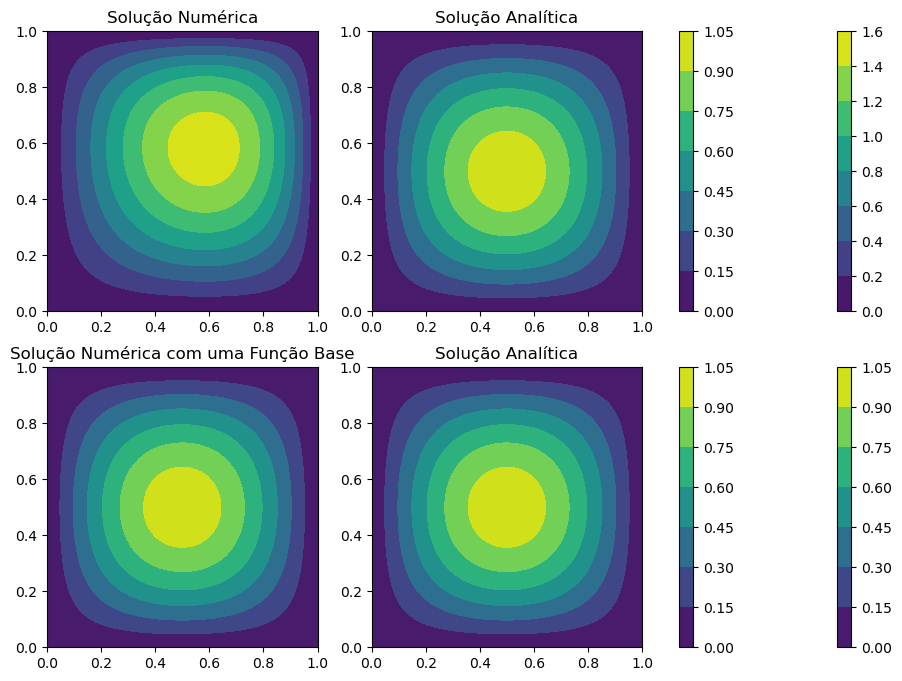

In [12]:
# Parâmetros
x_vals = np.linspace(0, 1, 50)
y_vals = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x_vals, y_vals)
f_func = lambda x, y: (2 * np.pi**2 + 1) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Solução com múltiplas funções base
funcs = [phi1, phi2, phi3, phi4]
grads = [grad_phi1, grad_phi2, grad_phi3, grad_phi4]
A, b = assemble_system(funcs, grads, f_func)
U_num = numerical_solution(A, b, funcs, x_vals, y_vals)

# Solução analítica
U_ana = analytical_solution(x_vals, y_vals)

# Plotando os resultados
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Solução numérica
c1 = axs[0][0].contourf(X, Y, U_num, cmap='viridis')
fig.colorbar(c1, ax=axs[0])
axs[0][0].set_title('Solução Numérica')

# Solução analítica
c2 = axs[0][1].contourf(X, Y, U_ana, cmap='viridis')
fig.colorbar(c2, ax=axs[1])
axs[0][1].set_title('Solução Analítica')

# Repetindo para uma única função base
funcs_single = [phi5]
grads_single = [grad_phi5]
A_single, b_single = assemble_system(funcs_single, grads_single, f_func)
U_num_single = numerical_solution(A_single, b_single, funcs_single, x_vals, y_vals)

# Solução numérica com uma função base
c1 = axs[1][0].contourf(X, Y, U_num_single, cmap='viridis')
fig.colorbar(c1, ax=axs[0])
axs[1][0].set_title('Solução Numérica com uma Função Base')

# Solução analítica
c2 = axs[1][1].contourf(X, Y, U_ana, cmap='viridis')
fig.colorbar(c2, ax=axs[1])
axs[1][1].set_title('Solução Analítica')

plt.savefig("images/exercicio10.png")
plt.show()